<a href="https://colab.research.google.com/github/oliverwsd/finance/blob/master/Set3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [0]:
#Task 1: read returns of test assets and factors

In [3]:
from io import StringIO
import csv


url = 'https://raw.githubusercontent.com/oliverwsd/finance/master/16pf_bm_beta.csv'
pf_16 = pd.read_csv(url)
pf_16.head()

,date,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
0,196207,2.27,-8.57,-2.09,-2.93,0.82,-6.30,-3.96,0.94,-4.21,-3.84,-1.44,-4.38,-1.96,-4.97,-4.00,-13.47
1,196208,-4.76,3.27,2.72,3.80,1.86,-1.15,0.96,-0.30,-3.08,-2.59,1.49,2.26,-0.82,-1.25,1.19,-2.93
2,196209,-3.02,-0.28,-5.11,-6.88,-3.44,-1.62,-4.09,-8.85,-0.65,-4.05,-6.13,-4.74,-5.62,-3.10,3.56,-3.41
3,196210,-3.89,-7.73,-6.27,-4.37,-5.18,-6.99,-3.56,-3.16,-3.06,-5.75,-4.40,-4.98,-2.54,-4.00,1.81,-3.77
4,196211,13.19,13.59,17.68,28.34,16.60,17.28,22.54,22.71,5.39,14.68,17.74,15.60,7.75,11.38,7.63,12.65


In [4]:
pf_16['date'] = pd.to_datetime(pf_16['date'],format='%Y%m')
pf_16.head()

,date,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
0,1962-07-01,2.27,-8.57,-2.09,-2.93,0.82,-6.30,-3.96,0.94,-4.21,-3.84,-1.44,-4.38,-1.96,-4.97,-4.00,-13.47
1,1962-08-01,-4.76,3.27,2.72,3.80,1.86,-1.15,0.96,-0.30,-3.08,-2.59,1.49,2.26,-0.82,-1.25,1.19,-2.93
2,1962-09-01,-3.02,-0.28,-5.11,-6.88,-3.44,-1.62,-4.09,-8.85,-0.65,-4.05,-6.13,-4.74,-5.62,-3.10,3.56,-3.41
3,1962-10-01,-3.89,-7.73,-6.27,-4.37,-5.18,-6.99,-3.56,-3.16,-3.06,-5.75,-4.40,-4.98,-2.54,-4.00,1.81,-3.77
4,1962-11-01,13.19,13.59,17.68,28.34,16.60,17.28,22.54,22.71,5.39,14.68,17.74,15.60,7.75,11.38,7.63,12.65


In [5]:
factors_url = 'https://raw.githubusercontent.com/oliverwsd/finance/master/monthly_factors.csv'
factors = pd.read_csv(factors_url)
factors['date'] = pd.to_datetime(factors['date'],format='%Y%m')
factors.head()

,date,rm,rf,SMB,HML,WML
0,1962-07-01,-5.53,0.25,-0.29,-1.05,2.38
1,1962-08-01,6.11,0.25,-5.50,-1.63,0.80
2,1962-09-01,-6.32,0.26,2.26,0.14,1.94
3,1962-10-01,-2.03,0.24,-3.12,1.13,1.14
4,1962-11-01,19.29,0.24,-0.87,-9.73,-10.36


In [0]:
# Read-in the factors for German market from the provided file 'monthly_factors.csv' (rf is risk free rate):
#   1. rm (Market factor)
#   2. SMB (Fama-French size factor)
#   3. HML (Fama-French value factor)
#   4. WML (Carhart momentum factor)

In [7]:
# Check 
print(pf_16.loc[1,'21'])
print(factors.loc[4,'SMB'])

1.86
-0.87


In [8]:
# Task2: Capital Asset Pricing Model
# Estimate the Capital Asset Pricing Model for the '11' and '44' portfolios
X = pd.DataFrame()
X['const'] = np.ones(len(factors['rm']))
X['rm_excess'] = factors['rm'] - factors['rf']
X.head()

,const,rm_excess
0,1.0,-5.78
1,1.0,5.86
2,1.0,-6.58
3,1.0,-2.27
4,1.0,19.05


In [9]:
# Y: excess return for the 11 PF
Y = pd.DataFrame()
Y['11_excess'] = pf_16['11'] - factors['rf']
Y.head()

,11_excess
0,2.02
1,-5.01
2,-3.28
3,-4.13
4,12.95


In [10]:
# Set up OLS model for 11 PF following the CAPM model: 
# r_{11} - r_f = \alpha + \beta * (r_M - r_f) + error_{11}
model_11 = sm.OLS(Y,X)
results_11 = model_11.fit()
print(results_11.summary())

                            OLS Regression Results                            
Dep. Variable:              11_excess   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     279.1
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.90e-52
Time:                        12:59:30   Log-Likelihood:                -1437.7
No. Observations:                 618   AIC:                             2879.
Df Residuals:                     616   BIC:                             2888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.100      0.012      0.9

In [11]:
Y = pd.DataFrame()
Y['44_excess'] = pf_16['44'] - factors['rf']
Y.head()

model_44 = sm.OLS(Y,X)
results_44 = model_44.fit()
print(results_44.summary())

                            OLS Regression Results                            
Dep. Variable:              44_excess   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     800.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):          1.65e-113
Time:                        12:59:30   Log-Likelihood:                -1746.0
No. Observations:                 618   AIC:                             3496.
Df Residuals:                     616   BIC:                             3505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1216      0.165      0.737      0.4

In [12]:
# Forecast using the CAPM
# expected market risk preimum MRP of 6%
# riskfree rate of 2 %
# alpha = 0
# Exp Ret = beta * Exp MRP 
# calculate expected return for PF 11 & 44
# Beta estimated from above OLS
EXP_MARKET_EXCESS_RETURN = 6
RISKFREE = 2
exp_ret_11 = results_11.params[1]* EXP_MARKET_EXCESS_RETURN + RISKFREE
exp_ret_44 = results_44.params[1]* EXP_MARKET_EXCESS_RETURN + RISKFREE
exp_ret_44

7.480192897399658

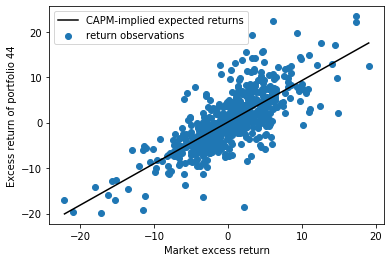

In [13]:
plt.scatter(X['rm_excess'], Y['44_excess'], label = 'return observations')
x = np.linspace(X['rm_excess'].min(), X['rm_excess'].max(), 30)
y = results_44.params[0] + results_44.params[1] * x
plt.plot(x, y, label = 'CAPM-implied expected returns', color = 'black')
plt.legend()
plt.xlabel("Market excess return")
plt.ylabel("Excess return of portfolio 44")
plt.show()

In [14]:
# Task 3: estimation of the security market line
portfolios = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']
betas = pd.DataFrame(index = portfolios, columns = ['beta'], dtype = np.float64)
for x in portfolios: 
  Y = pd.DataFrame()
  Y['excess'] = pf_16[x] - factors['rf']
  model_pf = sm.OLS(Y,X).fit()
  betas.loc[x,'beta'] = model_pf.params[1]
betas

,beta
11,0.327393
12,0.481310
13,0.732004
14,1.015993
21,0.367393
22,0.575950
23,0.780538
24,0.949568
31,0.359491
32,0.544161


In [15]:
# Now we enter the second stage of the estimation of the securities market line (SML). Recall the
# equation for the securities market line:
#                  r_i - r_f = \gamma * \beta_i + error_i
# You now have beta estimates for each portfolio. You also have monthly (excess) return observations
# for each portfolio. Hence, we can even estimate gamma for each month separately:
#                  r_{i,t} - r_{f,t} = \gamma_t * beta_i + error_{i,t},
# where t indicates the point of time.
# Iterate over all points of time in the pf_16 DataFrame and estimate gamma_t with an OLS
# regression. For each date, store the estimate in the 'gammas' DataFrame, e.g. like this:
# gammas.loc[0, 'gamma'] = ...
# gammas.loc[1, 'gamma'] = ... etc.
#
# Note: Unlike with the CAPM, do NOT add a constant to the regression when you estimate gamma.
# Hint: Again, use a for loop to iterate over the time points of the pf_16 DataFrame.
# Hint: Make sure to regress the excess return of a portfolio on the beta of the SAME portfolio.
#
gammas = pd.DataFrame(columns = ['date', 'gamma'])
gammas['date'] = pf_16['date'].copy()

beta_t = pd.DataFrame()
#for i in range(len(pf_16)):
pf = pf_16.drop(columns='date')
for i in range(len(pf_16)):
  r_t = pd.DataFrame()
  r_t = pf.iloc[i,0:16]- factors.iloc[i,2]
  result = sm.OLS(r_t, betas).fit()
  gammas.iloc[i,1] = result.params[0]
print(gammas.head())
gammas.loc[167,'gamma']
avg_gamma = gammas['gamma'].mean()

        date     gamma
0 1962-07-01  -5.72945
1 1962-08-01  0.204627
2 1962-09-01  -5.80496
3 1962-10-01  -5.99694
4 1962-11-01   22.1963


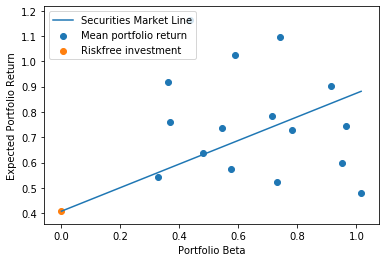

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


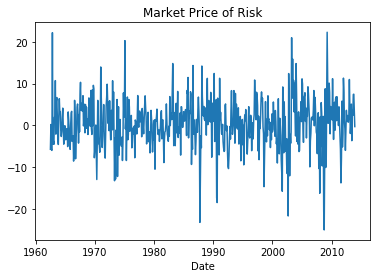

In [16]:
# Plot the securities market line
plt.scatter(betas['beta'], np.mean(pf_16[portfolios], axis = 0), label = 'Mean portfolio return')
plt.scatter([0], [np.mean(factors['rf'])], label = 'Riskfree investment')
x = np.linspace(0, betas['beta'].max(), 10)
y = np.mean(factors['rf']) + avg_gamma * x
plt.plot(x, y, label = 'Securities Market Line')
plt.legend()
plt.xlabel("Portfolio Beta")
plt.ylabel("Expected Portfolio Return")
plt.show()

# Plot the time series of the market price of risk
plt.plot(gammas['date'], gammas['gamma'])
plt.title("Market Price of Risk")
plt.xlabel("Date")
plt.show()


In [20]:
# Task 4: Fama-French 3 Factor Model
# ----------------------------------

# Estimate the Fama-French 3 Factor Model for portfolios '11' and '44'
#

# First, calculate market excess return (depending on what you did in between, you have this variable
# already from above). To be sure, we recalculate it here. Again, add a column 'const' that is filled
# with 1.
# Note: X should be a DataFrame. X.columns should be ['rm_excess', 'const']
#
X = pd.DataFrame()
X['rm_excess'] = factors['rm'] - factors['rf']
X['const'] = np.ones(len(factors['rm']))
X.head()


# Now, add the two other factors to X (columns 'SMB' and 'HML' in X and factors). You do not need to subtract the
# riskfree rate from these factors. Make sure the order of the columns in X is
# X.columns = ['const', 'rm_excess', 'SMB', 'HML']
# Q: Why do we not need to subtract the riskfree rate?
X['SMB'] = factors['SMB']
X['HML'] = factors['HML']
X.head()


# Calculate excess returns for the '11' portfolio. Again, you already did that above, but depending
# on what happened in between, maybe Y is something different now. Recalculate it here.
# Note: Y should be a DataFrame. Y.columns should be ['11_excess']
#
Y = pd.DataFrame()
Y['11_excess'] = pf_16['11'] - factors['rf']
Y.head()


# Now, estimate the FF3 model. Again, use OLS with the additional 'SMB' and 'HML' columns now.
#
model_11   = sm.OLS(Y,X)
results_11 = model_11.fit()

# Inspect the OLS estimates by calling the 'summary' function of the OLS result object.
#
print(results_11.summary())

# Repeat the exercise above for the '44' portfolio and inspect the Fama-French OLS estimates
# of the '44' portfolio.
#
Y = pd.DataFrame()
Y['44_excess'] = pf_16['44'] - factors['rf']
model_44   = sm.OLS(Y, X)
results_44 = model_44.fit()
print(results_44.summary())


                            OLS Regression Results                            
Dep. Variable:              11_excess   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.55e-87
Time:                        13:01:06   Log-Likelihood:                -1350.6
No. Observations:                 618   AIC:                             2709.
Df Residuals:                     614   BIC:                             2727.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm_excess      0.4787      0.020     23.631      0.0

In [22]:
print(results_11.params[2])
print(results_44.params[2])

0.4607765717207614
0.7925560689603134
